In [ ]:
!pip install opencv-python
!pip install numpy
!pip install matplotlib

ERROR: Could not find a version that satisfies the requirement python-opencv (from versions: none)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for python-opencv



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


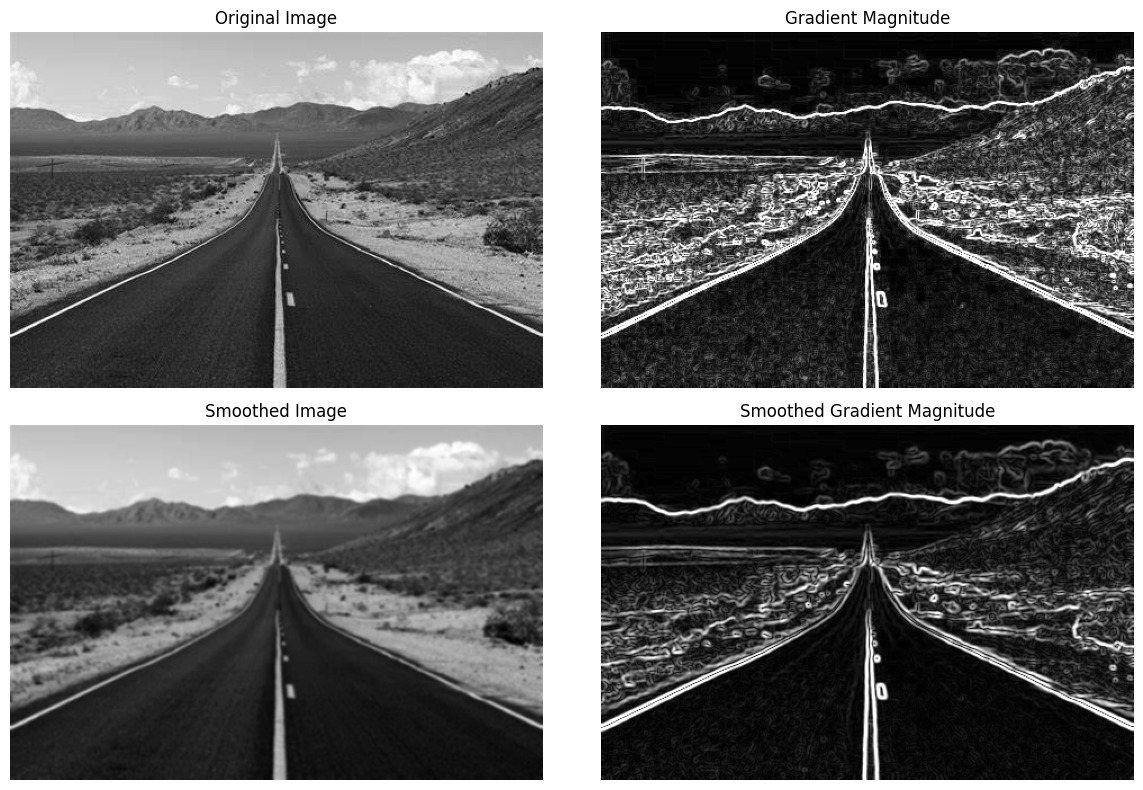

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread(r'C:\Users\Dilfina\OneDrive\Desktop\image\sem lab\OIP (2).jpeg', cv2.IMREAD_GRAYSCALE)

# Step 1: Apply Sobel filter to compute gradients
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Gradient in x-direction
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Gradient in y-direction

# Step 2: Compute the gradient magnitude
magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
magnitude = cv2.convertScaleAbs(magnitude)  # Convert to 8-bit

# Step 3: Smooth the image using Gaussian filter
smoothed_image = cv2.GaussianBlur(image, (5, 5), 0)

# Apply Sobel on smoothed image
sobel_x_smoothed = cv2.Sobel(smoothed_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y_smoothed = cv2.Sobel(smoothed_image, cv2.CV_64F, 0, 1, ksize=3)
magnitude_smoothed = np.sqrt(sobel_x_smoothed**2 + sobel_y_smoothed**2)
magnitude_smoothed = cv2.convertScaleAbs(magnitude_smoothed)

# Display results
titles = ['Original Image', 'Gradient Magnitude', 'Smoothed Image', 'Smoothed Gradient Magnitude']
images = [image, magnitude, smoothed_image, magnitude_smoothed]

plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [3]:
!pip install tensorflow

  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.2
    Uninstalling protobuf-3.20.2:
      Successfully uninstalled protobuf-3.20.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
paddlepaddle 2.6.1 requires protobuf<=3.20.2,>=3.1.0; platform_system == "Windows", but you have protobuf 4.25.5 which is incompatible.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Found 1027 files belonging to 2 classes.
Found 256 files belonging to 2 classes.
Number of training images: 1027
Number of validation images: 256


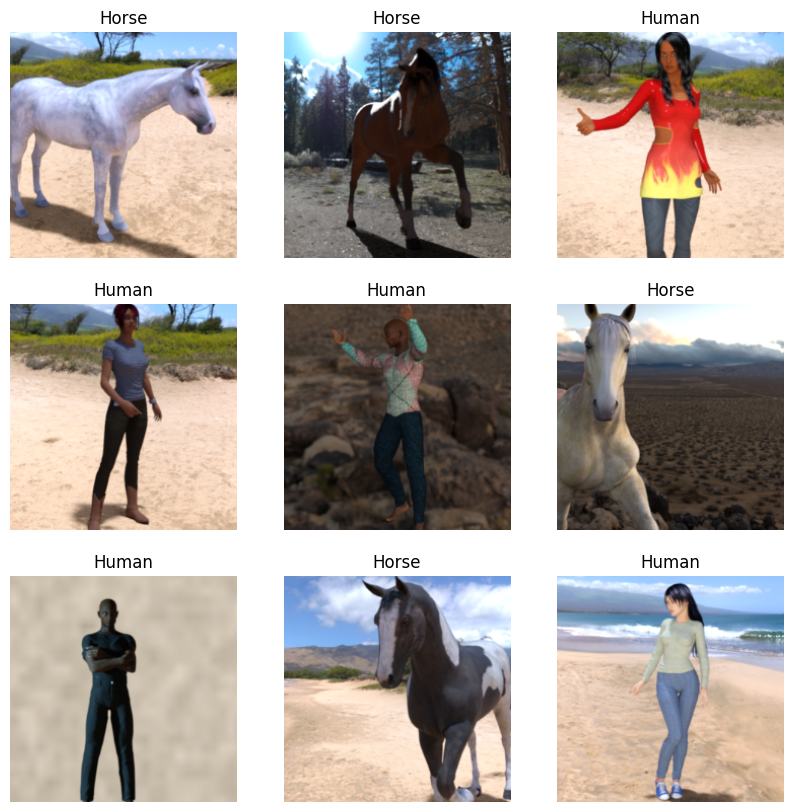

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step
Epoch 1/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.5045 - loss: 0.7035 - val_accuracy: 0.5664 - val_loss: 0.6701
Epoch 2/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.5462 - loss: 0.6795 - val_accuracy: 0.6328 - val_loss: 0.6336
Epoch 3/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.6058 - loss: 0.6571 - val_accuracy: 0.7109 - val_loss: 0.5998
Epoch 4/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.6593 - loss: 0.6368 - val_accuracy: 0.7266 - val_loss: 0.5771
Epoch 5/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.7166 - loss: 0.6205 - val_accuracy: 0.6133 - val_loss: 0.6324


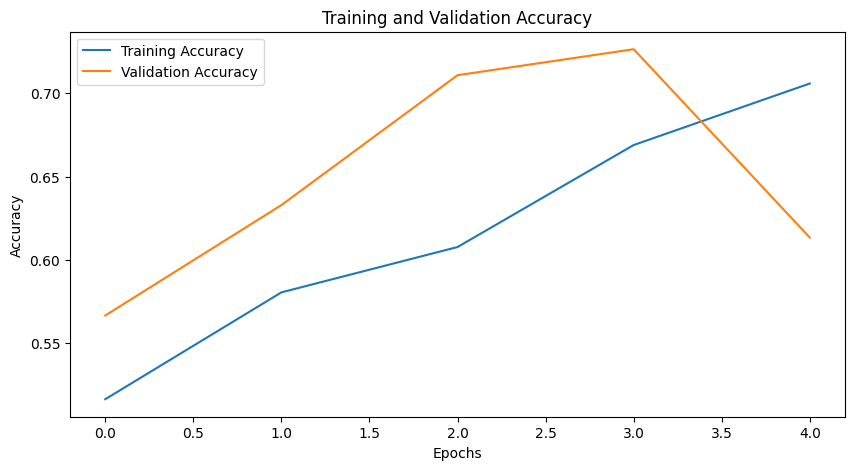

Final Training Accuracy: 70.59%
Final Validation Accuracy: 61.33%


In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset paths
train_dir = r'C:\Users\Dilfina\OneDrive\Desktop\image\sem lab\horse-or-human\train'
val_dir = r'C:\Users\Dilfina\OneDrive\Desktop\image\sem lab\horse-or-human\validation'

# a. Load the dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir, 
    image_size=(224, 224), 
    batch_size=32,
    label_mode='binary'
)
val_dataset = tf.keras.utils.image_dataset_from_directory(
    val_dir, 
    image_size=(224, 224), 
    batch_size=32,
    label_mode='binary'
)

# b. View the number of training and testing images
num_train_images = sum(len(batch[0]) for batch in train_dataset)
num_val_images = sum(len(batch[0]) for batch in val_dataset)
print(f"Number of training images: {num_train_images}")
print(f"Number of validation images: {num_val_images}")

# c. Plot some images
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title("Horse" if labels[i] == 0 else "Human")
        plt.axis("off")
plt.show()

# d. Normalize the training data
normalization_layer = layers.Rescaling(1.0 / 255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))

# e. Build a ResNet-based CNN
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the pre-trained layers

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=5
)

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Display the final accuracy
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
print(f"Final Training Accuracy: {train_acc * 100:.2f}%")
print(f"Final Validation Accuracy: {val_acc * 100:.2f}%")
